### Multiple Comparisons
- post hoc procedure: further comparisons after significant result from overall One-way ANOVA
- If the result for One-way ANOVA is good enough, i.e.some pairs are evidently true, we may omit some pairs to remove the number of tests
- Max of $G \choose 2$ pairwise comparisons
- Major issue: increased chance of making at least one Type I error when carrying out many tests, $E(\#errors)=\#tests \times \alpha$
- Two common solutions: based on controlling family Type I error rate, choose 
 - Bonferroni
 - Tukey's

_**Example**_
$P(\text{committing at least 1 Type I error})$ ?
- For n independent tests: $P = 1-(1-\alpha)^n$

#### Bonferroni's Method
- Based on Bonferroni's inequality $P(A\cup B) \leq P(A)+P(B)$, hence $P(\cup A_i)\leq \sum P(A_i), A_i:=$ the event that $i$th test results in a Type I error. 
- Method: conduct each of $k=G \choose 2$ pairwise tests at level $\alpha / k$
- CI: $|\bar{y}_i - \bar{y}_j|\pm t_{\alpha/2k} S_p \sqrt{n_i^{-1} + n_j^{-1}}$ 
- Conservative: overall Type I error rate is usually much less than $\alpha$ if tests are not mutually independent. 
- Type II error inflation.

#### Tukey's Approach
- Usually less conservative than Bonferroni, particularly if group sample size are similar. Controls the overall Type I error rate of $\alpha$, simultaneous CI converage rate is $1-\alpha$. 

_**Studentized Range distribution**_ <br>
- $\mathcal{X}= \{X_1,...,X_n\}, X_i\in N(\mu,\sigma^2)$. Determine the distribution of the max and min of $\mathcal{X}$. 
- $X_{(n)}:=\max{\mathcal{X}}, X_{(1)};=\min{\mathcal{X}}$, Range $:= X_{(n)}-X{(1)}$
- Based on $n$ observations from $X$, the Studentized range statistic is $Q_{stat} = Range / s, s=$ sample std. 
- Based on $G$ group means, with $n$ observations per group: $$\bar{Q}_g = \frac{\sqrt{n}(\bar{y}_{(g)} - \bar{y}_{(1)})}{s_v}$$
$s_v$ estimator of the pooled std. $v=N-G=G(n-1)$ d.f. 

- If there are $G$ groups, then there is a max of $k$ pairwise differences
- Controlling overall simultaneous Type I error rate v.s. Individual Type I error rate
- Find a pairwise significant difference
 - Compare method-wise significant difference, $c(\alpha)$ with $|\bar{y}_i - \bar{y}_j|$ OR 
 - determine whether CI contains 0 OR 
 - Compare $p$ with $\alpha$
- $s=\sqrt{MSE}$ with d.f. $=v=d.f.Error$

_**Tukey's Honestly Significant Difference (HSD)**_
- let $q(G,v,\alpha)/t^*:=$ the critical value from the Studentized Range distribution. 
- Family rate $=\alpha$
- Tukey's HSD $=q(G,v,\alpha) \frac{s}{\sqrt{n}}$

#### Case Study
Bonferroni
 - $H_0:\mu_i - \mu_j = 0, H_a: \mu_i\neq \mu_j$  
 - $t = \frac{\bar{x}_i - \bar{x}_j}{S_p \sqrt{n_i^{-1} + n_j^{-1}}}$
 - $p = 2P(T_{\alpha/2k}> |t|)$

In [1]:
# import data
library(Sleuth2)
jury = case0502
percent = case0502$Percent
judge = case0502$Judge

In [5]:
judge = relevel(judge, ref="Spock's")
pairwise.t.test(percent, judge, p.adj='bonf')


	Pairwise comparisons using t tests with pooled SD 

data:  percent and judge 

  Spock's A       B       C       D       E      
A 0.00022 -       -       -       -       -      
B 0.00013 1.00000 -       -       -       -      
C 0.00150 1.00000 1.00000 -       -       -      
D 0.57777 1.00000 1.00000 1.00000 -       -      
E 0.03408 1.00000 1.00000 1.00000 1.00000 -      
F 0.01254 1.00000 1.00000 1.00000 1.00000 1.00000

P value adjustment method: bonferroni 

In [6]:
# CI
lmod=lm(percent~judge)
confint(lmod, level = 1- 0.05/nlevels(judge))

,0.357 %,99.643 %
(Intercept),8.078085,21.16636
judgeA,8.547341,30.44821
judgeB,8.647254,29.34163
judgeC,5.222969,23.73259
judgeD,-2.969585,27.72514
judgeE,1.997255,22.69163
judgeF,2.922970,21.43259


In [8]:
amod = aov(percent~judge)
hsd = TukeyHSD(amod, 'judge')
hsd

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = percent ~ judge)

$judge
                 diff        lwr       upr     p adj
A-Spock's 19.49777727   7.514685 31.480870 0.0001992
B-Spock's 18.99444405   7.671486 30.317402 0.0001224
C-Spock's 14.47777732   4.350216 24.605339 0.0012936
D-Spock's 12.37777758  -4.416883 29.172438 0.2744263
E-Spock's 12.34444443   1.021486 23.667402 0.0248789
F-Spock's 12.17777766   2.050216 22.305339 0.0098340
B-A       -0.50333322 -13.512422 12.505755 0.9999997
C-A       -5.01999995 -17.003092  6.963092 0.8470098
D-A       -7.11999969 -25.094638 10.854639 0.8777485
E-A       -7.15333284 -20.162421  5.855755 0.6146239
F-A       -7.31999961 -19.303092  4.663093 0.4936380
C-B       -4.51666673 -15.839625  6.806291 0.8742030
D-B       -6.61666648 -24.158118 10.924785 0.9003280
E-B       -6.64999962 -19.053679  5.753679 0.6418003
F-B       -6.81666639 -18.139624  4.506292 0.5109582
D-C       -2.09999975 -18.894661

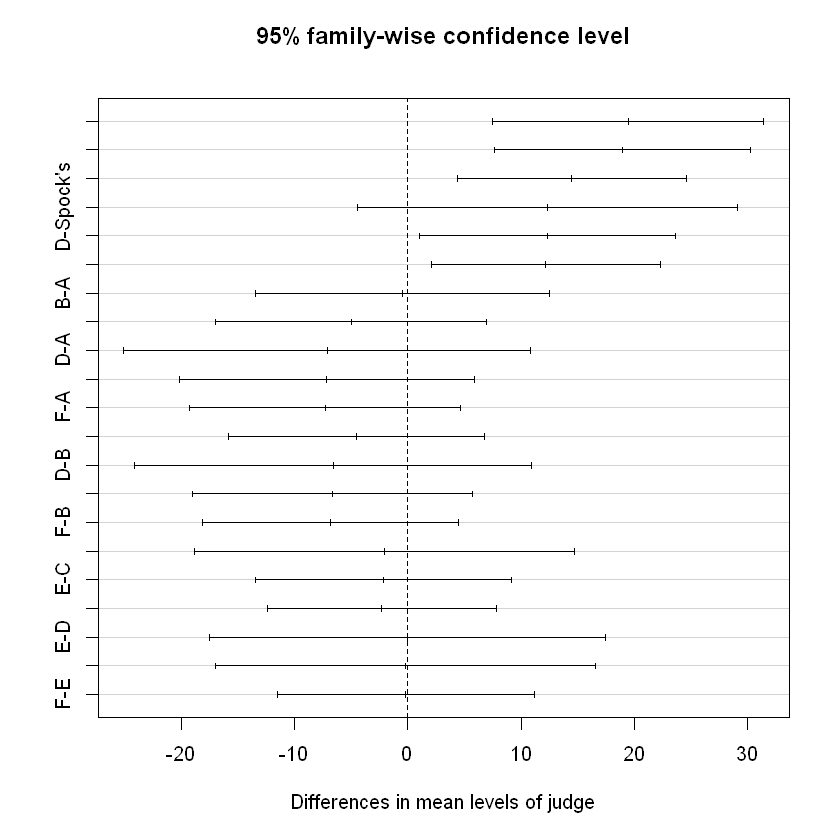

In [9]:
plot(hsd)